# **Preprocessing**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Class Proportions:
diabetes: 513 non_diabetes: 502


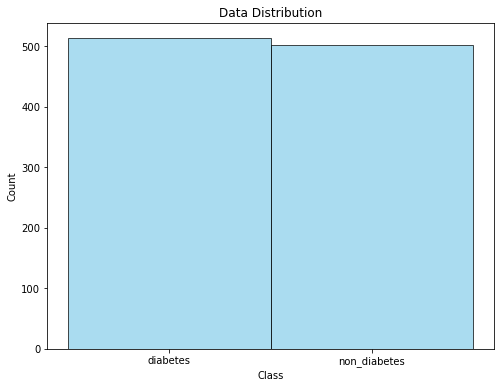

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/lab5/tongue_diabetes_new"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['diabetes', 'non_diabetes']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'diabetes' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("diabetes:", np.sum(labels == 0), "non_diabetes:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


# Equal amount of data is taken

In [2]:
# Separate data for Normal and Tuberculosis classes
diabetes_images = images[labels == 0][:500]
non_diabetes_images = images[labels == 1][:500]
diabetes_labels = labels[labels == 0][:500]
non_diabetes_labels = labels[labels == 1][:500]

# Concatenate the data back together
balanced_images = np.concatenate([diabetes_images, non_diabetes_images])
balanced_labels = np.concatenate([diabetes_labels, non_diabetes_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

#print the balanced data
print("Balanced Images:",balanced_images.shape)
print("Balanced labels:",balanced_labels.shape)

#print the data seperately of each class
print("diabetes_images:",diabetes_images.shape)
print("non_diabetes_images:",non_diabetes_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1000, 224, 224)
Balanced labels: (1000,)
diabetes_images: (500, 224, 224)
non_diabetes_images: (500, 224, 224)
X_train shape: (800, 224, 224)
X_test shape: (200, 224, 224)
y_train shape: (800,)
y_test shape: (200,)


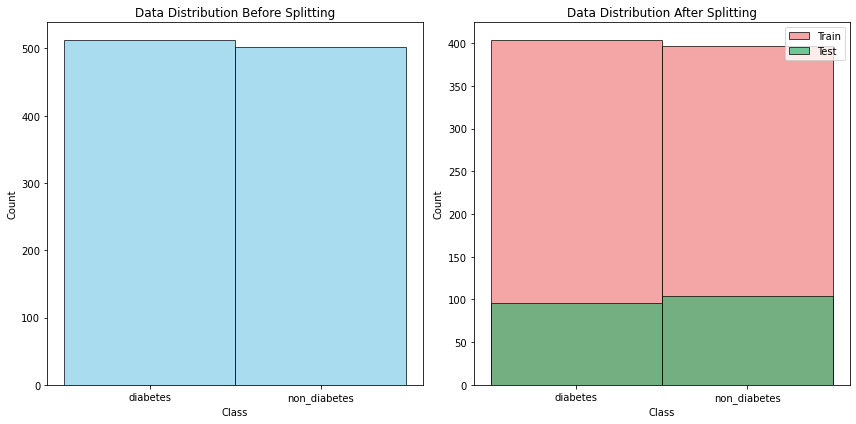

In [3]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# Plot histogram for class distribution after splitting
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


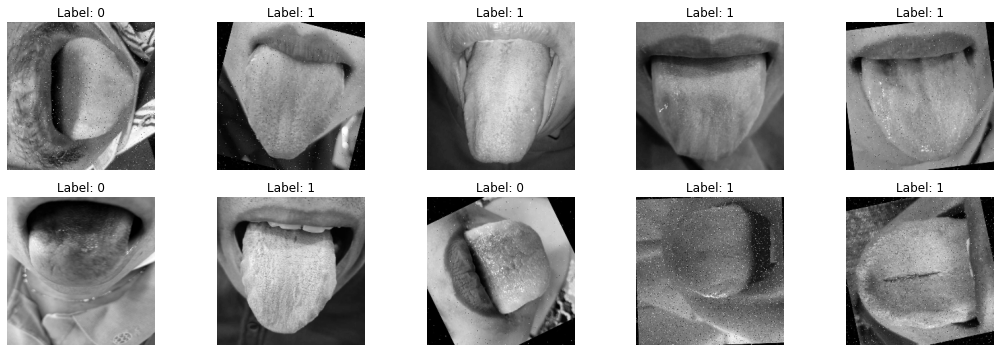

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [5]:
images[0]

array([[0.54901963, 0.54901963, 0.54901963, ..., 0.4392157 , 0.43137255,
        0.41568628],
       [0.5647059 , 0.5647059 , 0.5647059 , ..., 0.4392157 , 0.42745098,
        0.41568628],
       [0.56078434, 0.56078434, 0.56078434, ..., 0.4392157 , 0.42745098,
        0.41568628],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 0.01176471, 0.02745098,
        0.02352941],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.01960784, 0.02352941,
        0.02352941],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.03529412, 0.01960784,
        0.02352941]], dtype=float32)

# INCEPTIONV3+DENSE

2024-03-21 16:26:48.696257: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-21 16:26:48.961145: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 16:26:48.961175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 16:26:48.962169: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 16:26:49.050895: I tensorflow/core/platform/cpu_feature_g

Epoch 1/20
25/25 [==============================] - 32s 1s/step - loss: 3.9368 - accuracy: 0.6550 - precision: 0.6554 - recall: 0.6389 - auc: 0.6659 - auc_1: 0.6259 - true_negatives: 271.0000 - false_positives: 133.0000 - false_negatives: 143.0000 - true_positives: 253.0000 - val_loss: 4609.6230 - val_accuracy: 0.4800 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_auc_1: 0.5200 - val_true_negatives: 96.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 104.0000 - val_true_positives: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 28s 1s/step - loss: 0.3192 - accuracy: 0.8763 - precision: 0.8817 - recall: 0.8662 - auc: 0.9377 - auc_1: 0.9351 - true_negatives: 358.0000 - false_positives: 46.0000 - false_negatives: 53.0000 - true_positives: 343.0000 - val_loss: 8.6618 - val_accuracy: 0.4900 - val_precision: 0.7500 - val_recall: 0.0288 - val_auc: 0.6108 - val_auc_1: 0.6514 - val_true_negatives: 95.0000 - val_false_positives: 1.0000 - 

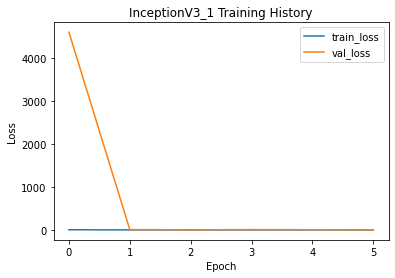

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'InceptionV3',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("InceptionV3(20)_1_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("InceptionV3_1 Training History")
plt.show()



Epoch 1/40
25/25 [==============================] - 34s 1s/step - loss: 3.8564 - accuracy: 0.5050 - precision_1: 0.5000 - recall_1: 0.4545 - auc_2: 0.5075 - auc_3: 0.4907 - true_negatives_1: 224.0000 - false_positives_1: 180.0000 - false_negatives_1: 216.0000 - true_positives_1: 180.0000 - val_loss: 4871.3530 - val_accuracy: 0.5100 - val_precision_1: 0.5152 - val_recall_1: 0.9808 - val_auc_2: 0.4904 - val_auc_3: 0.5152 - val_true_negatives_1: 0.0000e+00 - val_false_positives_1: 96.0000 - val_false_negatives_1: 2.0000 - val_true_positives_1: 102.0000
Epoch 2/40
25/25 [==============================] - 28s 1s/step - loss: 0.7168 - accuracy: 0.4638 - precision_1: 0.4591 - recall_1: 0.4672 - auc_2: 0.4623 - auc_3: 0.4699 - true_negatives_1: 186.0000 - false_positives_1: 218.0000 - false_negatives_1: 211.0000 - true_positives_1: 185.0000 - val_loss: 6.6516 - val_accuracy: 0.5050 - val_precision_1: 0.5177 - val_recall_1: 0.7019 - val_auc_2: 0.5183 - val_auc_3: 0.5969 - val_true_negatives_1: 

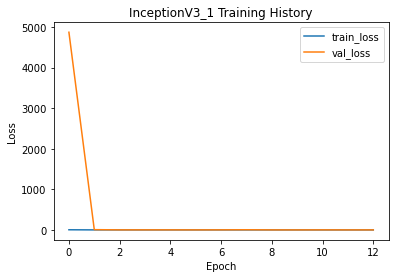

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'InceptionV3',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("InceptionV3(40)_1_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("InceptionV3_1 Training History")
plt.show()



Epoch 1/60
25/25 [==============================] - 34s 1s/step - loss: 4.5956 - accuracy: 0.6862 - precision_2: 0.6722 - recall_2: 0.7146 - auc_4: 0.6890 - auc_5: 0.6194 - true_negatives_2: 266.0000 - false_positives_2: 138.0000 - false_negatives_2: 113.0000 - true_positives_2: 283.0000 - val_loss: 431.7636 - val_accuracy: 0.5700 - val_precision_2: 0.8462 - val_recall_2: 0.2115 - val_auc_4: 0.5847 - val_auc_5: 0.6394 - val_true_negatives_2: 92.0000 - val_false_positives_2: 4.0000 - val_false_negatives_2: 82.0000 - val_true_positives_2: 22.0000
Epoch 2/60
25/25 [==============================] - 28s 1s/step - loss: 0.3861 - accuracy: 0.8637 - precision_2: 0.8458 - recall_2: 0.8864 - auc_4: 0.9269 - auc_5: 0.9127 - true_negatives_2: 340.0000 - false_positives_2: 64.0000 - false_negatives_2: 45.0000 - true_positives_2: 351.0000 - val_loss: 2.5133 - val_accuracy: 0.5850 - val_precision_2: 0.5854 - val_recall_2: 0.6923 - val_auc_4: 0.6477 - val_auc_5: 0.6378 - val_true_negatives_2: 45.0000

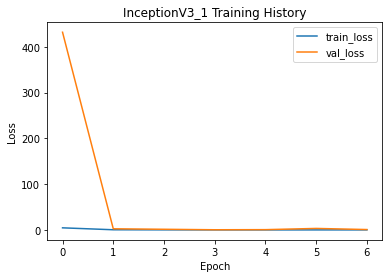

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'InceptionV3',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("InceptionV3(60)_1_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("InceptionV3_1 Training History")
plt.show()



Epoch 1/80
25/25 [==============================] - 34s 1s/step - loss: 4.2230 - accuracy: 0.5225 - precision_3: 0.5126 - recall_3: 0.7172 - auc_6: 0.5531 - auc_7: 0.5295 - true_negatives_3: 134.0000 - false_positives_3: 270.0000 - false_negatives_3: 112.0000 - true_positives_3: 284.0000 - val_loss: 3977.8704 - val_accuracy: 0.5200 - val_precision_3: 0.5200 - val_recall_3: 1.0000 - val_auc_6: 0.5000 - val_auc_7: 0.5200 - val_true_negatives_3: 0.0000e+00 - val_false_positives_3: 96.0000 - val_false_negatives_3: 0.0000e+00 - val_true_positives_3: 104.0000
Epoch 2/80
25/25 [==============================] - 28s 1s/step - loss: 0.6722 - accuracy: 0.5788 - precision_3: 0.6081 - recall_3: 0.4192 - auc_6: 0.6363 - auc_7: 0.5936 - true_negatives_3: 297.0000 - false_positives_3: 107.0000 - false_negatives_3: 230.0000 - true_positives_3: 166.0000 - val_loss: 3.6773 - val_accuracy: 0.5100 - val_precision_3: 0.5161 - val_recall_3: 0.9231 - val_auc_6: 0.5360 - val_auc_7: 0.5526 - val_true_negatives

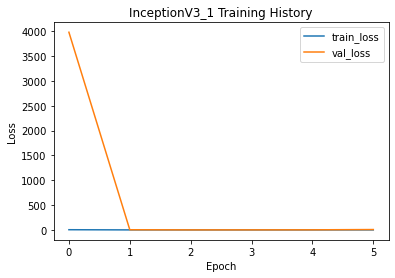

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'InceptionV3',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("InceptionV3(80)_1_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("InceptionV3_1 Training History")
plt.show()



Epoch 1/100
25/25 [==============================] - 34s 1s/step - loss: 3.7382 - accuracy: 0.4913 - precision_4: 0.4880 - recall_4: 0.5631 - auc_8: 0.5171 - auc_9: 0.5189 - true_negatives_4: 170.0000 - false_positives_4: 234.0000 - false_negatives_4: 173.0000 - true_positives_4: 223.0000 - val_loss: 6232.6938 - val_accuracy: 0.5200 - val_precision_4: 0.5200 - val_recall_4: 1.0000 - val_auc_8: 0.5000 - val_auc_9: 0.5200 - val_true_negatives_4: 0.0000e+00 - val_false_positives_4: 96.0000 - val_false_negatives_4: 0.0000e+00 - val_true_positives_4: 104.0000
Epoch 2/100
25/25 [==============================] - 29s 1s/step - loss: 0.7900 - accuracy: 0.5625 - precision_4: 0.5975 - recall_4: 0.3561 - auc_8: 0.6061 - auc_9: 0.6331 - true_negatives_4: 309.0000 - false_positives_4: 95.0000 - false_negatives_4: 255.0000 - true_positives_4: 141.0000 - val_loss: 460.2859 - val_accuracy: 0.5200 - val_precision_4: 0.5200 - val_recall_4: 1.0000 - val_auc_8: 0.5000 - val_auc_9: 0.5200 - val_true_negati

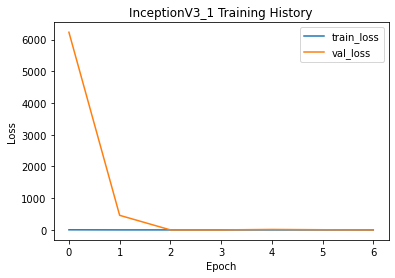

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'InceptionV3',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("InceptionV3(100)_1_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("InceptionV3_1 Training History")
plt.show()



In [12]:
import pandas as pd
from IPython.display import display


# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("InceptionV3(20)_1_Metrics.csv")
metrics_40_epochs = pd.read_csv("InceptionV3(40)_1_Metrics.csv")
metrics_60_epochs = pd.read_csv("InceptionV3(60)_1_Metrics.csv")
metrics_80_epochs = pd.read_csv("InceptionV3(80)_1_Metrics.csv")
metrics_100_epochs = pd.read_csv("InceptionV3(100)_1_Metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model1(InceptionV3)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)

# Display metrics
display(all_metrics)



Model  Epochs  Test Accuracy  Test Loss  Validation Accuracy  \
0  InceptionV3      20          0.585   1.346931                0.805   
1  InceptionV3      40          0.885   0.359322                0.640   
2  InceptionV3      60          0.825   0.377897                0.890   
3  InceptionV3      80          0.535   0.878268                0.655   
4  InceptionV3     100          0.560   0.659259                0.725   

   Validation Loss  Precision    Recall   AUC-ROC    AUC-PR  True Negatives  \
0         2.024152   0.888889  0.230769  0.599760  0.759829            93.0   
1         0.816532   0.858407  0.932692  0.883013  0.913050            80.0   
2         0.856008   0.848485  0.807692  0.825721  0.878089            81.0   
3         7.727455   0.529412  0.951923  0.517628  0.753167             8.0   
4         1.253331   1.000000  0.153846  0.576923  0.796923            96.0   

   False Positives  False Negatives  True Positives  Error Rate  F1 Score  \
0              3.0             80.0            24.0      0.5146  0.366412   
1             16.0              7.0            97.0      0.4974  0.894009   
2             15.0             20.0            84.0      0.5002  0.827586   
3             88.0              5.0            99.0      0.4826  0.680412   
4              0.0             88.0            16.0      0.5168  0.266667   

   Cohen's Kappa  Matthews Correlation Coefficient  Balanced Accuracy  \
0       0.193548                          0.291697           0.599760   
1       0.768798                          0.771963           0.883013   
2       0.650140                          0.650953           0.825721   
3       0.036469                          0.071449           0.517628   
4       0.148607                          0.283315           0.576923   

   Time Taken (seconds)  
0            178.335159  
1            379.902248  
2            209.580553  
3            180.999789  
4            211.130203

In [13]:
num_training_records = X_train_resized.shape[0]
print("Number of training records:", num_training_records)


Number of training records: 800


# INCEPTIONV3+DROPOUT+DENSE

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                      

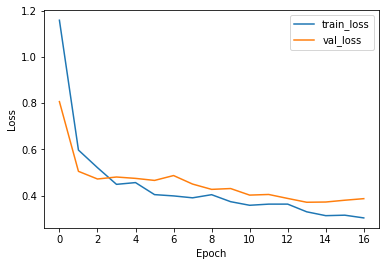

7/7 [==============================] - 1s 210ms/step - loss: 0.3711 - accuracy: 0.8400 - precision_5: 0.8273 - recall_5: 0.8750 - auc_10: 0.9152 - auc_11: 0.9255 - true_negatives_5: 77.0000 - false_positives_5: 19.0000 - false_negatives_5: 13.0000 - true_positives_5: 91.0000
Test Accuracy: 84.00%
Test Loss: 0.37
Precision: 0.83
Recall: 0.88
AUC-ROC: 0.92
AUC-PR: 0.93
TN: 77.0, FP: 19.0, FN: 13.0, TP: 91.0
7/7 [==============================] - 2s 208ms/step
Confusion Matrix:
[[77 19]
 [13 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        96
           1       0.83      0.88      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

AUC Score: 0.84
Precision: 0.83
Recall: 0.88
F1 Score: 0.85
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.68
Matthews Correlation Coefficient (MCC): 0.68
B

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained InceptionV3 model without top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV file
metrics = {
    'Model': 'InceptionV3_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

df = pd.DataFrame(metrics)
df.to_csv("InceptionV3(2)_20_Epochs_Metrics.csv", index=False)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                      

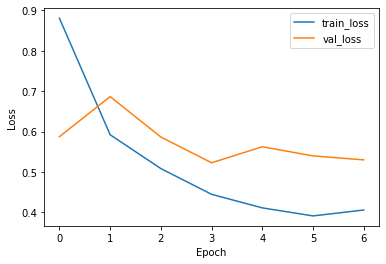

7/7 [==============================] - 1s 198ms/step - loss: 0.5227 - accuracy: 0.7500 - precision_8: 0.8857 - recall_8: 0.5962 - auc_16: 0.8820 - auc_17: 0.9020 - true_negatives_8: 88.0000 - false_positives_8: 8.0000 - false_negatives_8: 42.0000 - true_positives_8: 62.0000
Test Accuracy: 75.00%
Test Loss: 0.52
Precision: 0.89
Recall: 0.60
AUC-ROC: 0.88
AUC-PR: 0.90
TN: 88.0, FP: 8.0, FN: 42.0, TP: 62.0
7/7 [==============================] - 2s 189ms/step
Confusion Matrix:
[[88  8]
 [42 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        96
           1       0.89      0.60      0.71       104

    accuracy                           0.75       200
   macro avg       0.78      0.76      0.75       200
weighted avg       0.79      0.75      0.74       200

AUC Score: 0.76
Precision: 0.89
Recall: 0.60
F1 Score: 0.71
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.51
Matthews Correlation Coefficient (MCC): 0.54
Bal

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained InceptionV3 model without top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time
# taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV file
metrics = {
    'Model': 'InceptionV3_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Create DataFrame
df = pd.DataFrame(metrics)

# Save to CSV file
df.to_csv("InceptionV3(2)_40_Epochs_Metrics.csv", index=False)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 513       
                                                      

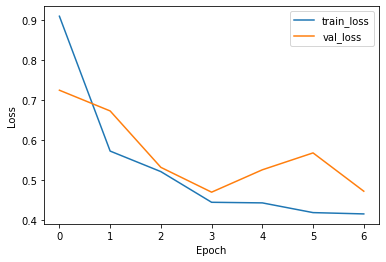

7/7 [==============================] - 1s 209ms/step - loss: 0.4705 - accuracy: 0.7950 - precision_9: 0.8621 - recall_9: 0.7212 - auc_18: 0.8817 - auc_19: 0.8860 - true_negatives_9: 84.0000 - false_positives_9: 12.0000 - false_negatives_9: 29.0000 - true_positives_9: 75.0000
Test Accuracy: 79.50%
Test Loss: 0.47
Precision: 0.86
Recall: 0.72
AUC-ROC: 0.88
AUC-PR: 0.89
TN: 84.0, FP: 12.0, FN: 29.0, TP: 75.0
7/7 [==============================] - 2s 205ms/step
Confusion Matrix:
[[84 12]
 [29 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        96
           1       0.86      0.72      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200

AUC Score: 0.80
Precision: 0.86
Recall: 0.72
F1 Score: 0.79
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.59
Matthews Correlation Coefficient (MCC): 0.60
B

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained InceptionV3 model without top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time
# taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV file
metrics = {
    'Model': 'InceptionV3_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Create DataFrame
df = pd.DataFrame(metrics)

# Save to CSV file
df.to_csv("InceptionV3(2)_60_Epochs_Metrics.csv", index=False)



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 513       
                                                     

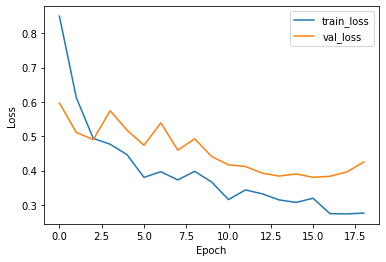

7/7 [==============================] - 1s 210ms/step - loss: 0.3804 - accuracy: 0.8150 - precision_10: 0.8252 - recall_10: 0.8173 - auc_20: 0.9094 - auc_21: 0.9261 - true_negatives_10: 78.0000 - false_positives_10: 18.0000 - false_negatives_10: 19.0000 - true_positives_10: 85.0000
Test Accuracy: 81.50%
Test Loss: 0.38
Precision: 0.83
Recall: 0.82
AUC-ROC: 0.91
AUC-PR: 0.93
TN: 78.0, FP: 18.0, FN: 19.0, TP: 85.0
7/7 [==============================] - 2s 207ms/step
Confusion Matrix:
[[78 18]
 [19 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        96
           1       0.83      0.82      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200

AUC Score: 0.81
Precision: 0.83
Recall: 0.82
F1 Score: 0.82
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained InceptionV3 model without top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time
# taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

## Save metrics to CSV file
metrics = {
    'Model': 'InceptionV3_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Create DataFrame
df = pd.DataFrame(metrics)

# Save to CSV file
df.to_csv("InceptionV3(2)_80_Epochs_Metrics.csv", index=False)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_6  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 513       
                                                     

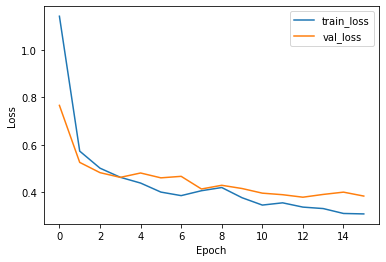

7/7 [==============================] - 1s 211ms/step - loss: 0.3799 - accuracy: 0.8050 - precision_11: 0.7982 - recall_11: 0.8365 - auc_22: 0.9133 - auc_23: 0.9276 - true_negatives_11: 74.0000 - false_positives_11: 22.0000 - false_negatives_11: 17.0000 - true_positives_11: 87.0000
Test Accuracy: 80.50%
Test Loss: 0.38
Precision: 0.80
Recall: 0.84
AUC-ROC: 0.91
AUC-PR: 0.93
TN: 74.0, FP: 22.0, FN: 17.0, TP: 87.0
7/7 [==============================] - 2s 208ms/step
Confusion Matrix:
[[74 22]
 [17 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        96
           1       0.80      0.84      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

AUC Score: 0.80
Precision: 0.80
Recall: 0.84
F1 Score: 0.82
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained InceptionV3 model without top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with InceptionV3 base and additional layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time
# taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV file
metrics = {
    'Model': 'InceptionV3_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Create DataFrame
df = pd.DataFrame(metrics)

# Save to CSV file
df.to_csv("InceptionV3(2)_100_Epochs_Metrics.csv", index=False)



In [21]:
import pandas as pd
from IPython.display import display


# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("InceptionV3(2)_20_Epochs_Metrics.csv")
metrics_40_epochs = pd.read_csv("InceptionV3(2)_40_Epochs_Metrics.csv")
metrics_60_epochs = pd.read_csv("InceptionV3(2)_60_Epochs_Metrics.csv")
metrics_80_epochs = pd.read_csv("InceptionV3(2)_80_Epochs_Metrics.csv")
metrics_100_epochs = pd.read_csv("InceptionV3(2)_100_Epochs_Metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model2(InceptionV3)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)

# Display metrics
display(all_metrics)



Model  Epochs  Test Accuracy  Test Loss  \
0    InceptionV3_20_Epochs      20          0.825   0.409887   
1    InceptionV3_20_Epochs      20          0.825   0.409887   
2    InceptionV3_20_Epochs      20          0.825   0.409887   
3    InceptionV3_40_Epochs      40          0.750   0.522740   
4    InceptionV3_40_Epochs      40          0.750   0.522740   
5    InceptionV3_40_Epochs      40          0.750   0.522740   
6    InceptionV3_60_Epochs      60          0.795   0.470459   
7    InceptionV3_60_Epochs      60          0.795   0.470459   
8    InceptionV3_60_Epochs      60          0.795   0.470459   
9    InceptionV3_80_Epochs      80          0.815   0.380362   
10   InceptionV3_80_Epochs      80          0.815   0.380362   
11   InceptionV3_80_Epochs      80          0.815   0.380362   
12  InceptionV3_100_Epochs     100          0.805   0.379915   
13  InceptionV3_100_Epochs     100          0.805   0.379915   
14  InceptionV3_100_Epochs     100          0.805   0.379915   

    Validation Accuracy  Validation Loss  Precision    Recall   AUC-ROC  \
0                 0.815         0.419429   0.520000  1.000000  0.902794   
1                 0.815         0.419429   0.863158  0.788462  0.902794   
2                 0.815         0.419429   1.000000  0.000000  0.902794   
3                 0.735         0.529964   0.520000  1.000000  0.881961   
4                 0.735         0.529964   0.885714  0.596154  0.881961   
5                 0.735         0.529964   1.000000  0.000000  0.881961   
6                 0.795         0.472822   0.520000  1.000000  0.881661   
7                 0.795         0.472822   0.862069  0.721154  0.881661   
8                 0.795         0.472822   1.000000  0.000000  0.881661   
9                 0.815         0.425164   0.520000  1.000000  0.909405   
10                0.815         0.425164   0.825243  0.817308  0.909405   
11                0.815         0.425164   1.000000  0.000000  0.909405   
12                0.840         0.384689   0.520000  1.000000  0.913261   
13                0.840         0.384689   0.798165  0.836538  0.913261   
14                0.840         0.384689   1.000000  0.000000  0.913261   

      AUC-PR  True Negatives  False Positives  False Negatives  \
0   0.910993            83.0             13.0             22.0   
1   0.910993            83.0             13.0             22.0   
2   0.910993            83.0             13.0             22.0   
3   0.901977            88.0              8.0             42.0   
4   0.901977            88.0              8.0             42.0   
5   0.901977            88.0              8.0             42.0   
6   0.885986            84.0             12.0             29.0   
7   0.885986            84.0             12.0             29.0   
8   0.885986            84.0             12.0             29.0   
9   0.926117            78.0             18.0             19.0   
10  0.926117            78.0             18.0             19.0   
11  0.926117            78.0             18.0             19.0   
12  0.927606            74.0             22.0             17.0   
13  0.927606            74.0             22.0             17.0   
14  0.927606            74.0             22.0             17.0   

    True Positives  Cohen's Kappa  Matthews Correlation Coefficient  \
0             82.0       0.650699                          0.653339   
1             82.0       0.650699                          0.653339   
2             82.0       0.650699                          0.653339   
3             62.0       0.505929                          0.537152   
4             62.0       0.505929                          0.537152   
5             62.0       0.505929                          0.537152   
6             75.0       0.592121                          0.600775   
7             75.0       0.592121                          0.600775   
8             75.0       0.592121                          0.600775   
9             85.0       0.6

# INCEPTIONV(A) + GlobalAveragePooling2D + Dense Layers (B)

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels


# Define InceptionV3 base model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False

# Add layers on top of the InceptionV3 base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Generate classification report
classification_rep = classification_report(y_test, test_predictions, output_dict=True)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Save metrics to CSV file
metrics_inceptionv3 = {
    'Model': 'InceptionV3 (A) + GlobalAveragePooling2D + Dense Layers (B)',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': conf_matrix[0, 0],
    'False Positives': conf_matrix[0, 1],
    'False Negatives': conf_matrix[1, 0],
    'True Positives': conf_matrix[1, 1],
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_inceptionv3 = pd.DataFrame(metrics_inceptionv3, index=[0])

# Save metrics to CSV file
metrics_df_inceptionv3.to_csv('INCMODEL3(20)_metrics.csv', index=False)


Epoch 1/20
25/25 [==============================] - 8s 256ms/step - loss: 1.3978 - accuracy: 0.5750 - val_loss: 0.6589 - val_accuracy: 0.5350
Epoch 2/20
25/25 [==============================] - 6s 234ms/step - loss: 0.5388 - accuracy: 0.7437 - val_loss: 0.5520 - val_accuracy: 0.7350
Epoch 3/20
25/25 [==============================] - 6s 249ms/step - loss: 0.4410 - accuracy: 0.8025 - val_loss: 0.5525 - val_accuracy: 0.7150
Epoch 4/20
25/25 [==============================] - 7s 276ms/step - loss: 0.3713 - accuracy: 0.8325 - val_loss: 0.4881 - val_accuracy: 0.7950
Epoch 5/20
25/25 [==============================] - 7s 273ms/step - loss: 0.3175 - accuracy: 0.8763 - val_loss: 0.4462 - val_accuracy: 0.8100
Epoch 6/20
25/25 [==============================] - 7s 272ms/step - loss: 0.2734 - accuracy: 0.8963 - val_loss: 0.4204 - val_accuracy: 0.8100
Epoch 7/20
25/25 [==============================] - 7s 274ms/step - loss: 0.2369 - accuracy: 0.9212 - val_loss: 0.4062 - val_accuracy: 0.8250
Epoch 

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels


# Define InceptionV3 base model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False

# Add layers on top of the InceptionV3 base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Generate classification report
classification_rep = classification_report(y_test, test_predictions, output_dict=True)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Save metrics to CSV file
metrics_inceptionv3 = {
    'Model': 'InceptionV3 (A) + GlobalAveragePooling2D + Dense Layers (B)',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': conf_matrix[0, 0],
    'False Positives': conf_matrix[0, 1],
    'False Negatives': conf_matrix[1, 0],
    'True Positives': conf_matrix[1, 1],
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_inceptionv3 = pd.DataFrame(metrics_inceptionv3, index=[0])

# Save metrics to CSV file
metrics_df_inceptionv3.to_csv('INCMODEL3(40)_metrics.csv', index=False)


Epoch 1/40
25/25 [==============================] - 9s 323ms/step - loss: 0.8391 - accuracy: 0.6425 - val_loss: 0.5546 - val_accuracy: 0.7400
Epoch 2/40
25/25 [==============================] - 8s 305ms/step - loss: 0.4108 - accuracy: 0.8200 - val_loss: 0.5481 - val_accuracy: 0.7200
Epoch 3/40
25/25 [==============================] - 8s 303ms/step - loss: 0.3307 - accuracy: 0.8525 - val_loss: 0.4605 - val_accuracy: 0.7950
Epoch 4/40
25/25 [==============================] - 7s 302ms/step - loss: 0.2777 - accuracy: 0.8900 - val_loss: 0.4172 - val_accuracy: 0.7900
Epoch 5/40
25/25 [==============================] - 7s 301ms/step - loss: 0.2285 - accuracy: 0.9175 - val_loss: 0.4336 - val_accuracy: 0.8050
Epoch 6/40
25/25 [==============================] - 7s 301ms/step - loss: 0.1963 - accuracy: 0.9388 - val_loss: 0.4781 - val_accuracy: 0.7700
Epoch 7/40
25/25 [==============================] - 8s 303ms/step - loss: 0.1779 - accuracy: 0.9400 - val_loss: 0.5601 - val_accuracy: 0.7250
Epoch 

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels


# Define InceptionV3 base model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False

# Add layers on top of the InceptionV3 base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Generate classification report
classification_rep = classification_report(y_test, test_predictions, output_dict=True)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Save metrics to CSV file
metrics_inceptionv3 = {
    'Model': 'InceptionV3 (A) + GlobalAveragePooling2D + Dense Layers (B)',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': conf_matrix[0, 0],
    'False Positives': conf_matrix[0, 1],
    'False Negatives': conf_matrix[1, 0],
    'True Positives': conf_matrix[1, 1],
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_inceptionv3 = pd.DataFrame(metrics_inceptionv3, index=[0])

# Save metrics to CSV file
metrics_df_inceptionv3.to_csv('INCMODEL3(60)_metrics.csv', index=False)


Epoch 1/60
25/25 [==============================] - 9s 318ms/step - loss: 1.0910 - accuracy: 0.6087 - val_loss: 0.7052 - val_accuracy: 0.5600
Epoch 2/60
25/25 [==============================] - 8s 303ms/step - loss: 0.4808 - accuracy: 0.7675 - val_loss: 0.6170 - val_accuracy: 0.6800
Epoch 3/60
25/25 [==============================] - 7s 302ms/step - loss: 0.4005 - accuracy: 0.8163 - val_loss: 0.5663 - val_accuracy: 0.7050
Epoch 4/60
25/25 [==============================] - 7s 302ms/step - loss: 0.3348 - accuracy: 0.8487 - val_loss: 0.4999 - val_accuracy: 0.7900
Epoch 5/60
25/25 [==============================] - 7s 302ms/step - loss: 0.2872 - accuracy: 0.8825 - val_loss: 0.4675 - val_accuracy: 0.7950
Epoch 6/60
25/25 [==============================] - 7s 302ms/step - loss: 0.2460 - accuracy: 0.9087 - val_loss: 0.4368 - val_accuracy: 0.8050
Epoch 7/60
25/25 [==============================] - 7s 302ms/step - loss: 0.2096 - accuracy: 0.9350 - val_loss: 0.4204 - val_accuracy: 0.8200
Epoch 

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels


# Define InceptionV3 base model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False

# Add layers on top of the InceptionV3 base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Generate classification report
classification_rep = classification_report(y_test, test_predictions, output_dict=True)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Save metrics to CSV file
metrics_inceptionv3 = {
    'Model': 'InceptionV3 (A) + GlobalAveragePooling2D + Dense Layers (B)',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': conf_matrix[0, 0],
    'False Positives': conf_matrix[0, 1],
    'False Negatives': conf_matrix[1, 0],
    'True Positives': conf_matrix[1, 1],
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_inceptionv3 = pd.DataFrame(metrics_inceptionv3, index=[0])

# Save metrics to CSV file
metrics_df_inceptionv3.to_csv('INCMODEL3(80)_metrics.csv', index=False)


Epoch 1/80
25/25 [==============================] - 10s 323ms/step - loss: 1.2816 - accuracy: 0.5575 - val_loss: 0.6525 - val_accuracy: 0.6400
Epoch 2/80
25/25 [==============================] - 8s 307ms/step - loss: 0.5802 - accuracy: 0.6913 - val_loss: 0.5793 - val_accuracy: 0.7200
Epoch 3/80
25/25 [==============================] - 8s 304ms/step - loss: 0.4776 - accuracy: 0.7887 - val_loss: 0.5304 - val_accuracy: 0.7600
Epoch 4/80
25/25 [==============================] - 8s 308ms/step - loss: 0.4075 - accuracy: 0.8188 - val_loss: 0.5046 - val_accuracy: 0.7600
Epoch 5/80
25/25 [==============================] - 8s 306ms/step - loss: 0.3523 - accuracy: 0.8500 - val_loss: 0.4708 - val_accuracy: 0.8000
Epoch 6/80
25/25 [==============================] - 7s 302ms/step - loss: 0.3035 - accuracy: 0.8800 - val_loss: 0.4353 - val_accuracy: 0.8100
Epoch 7/80
25/25 [==============================] - 7s 300ms/step - loss: 0.2645 - accuracy: 0.9050 - val_loss: 0.4095 - val_accuracy: 0.8150
Epoch

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, axis=-1)  # Repeat grayscale channel to 3 channels


# Define InceptionV3 base model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False

# Add layers on top of the InceptionV3 base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Generate classification report
classification_rep = classification_report(y_test, test_predictions, output_dict=True)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Save metrics to CSV file
metrics_inceptionv3 = {
    'Model': 'InceptionV3 (A) + GlobalAveragePooling2D + Dense Layers (B)',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': conf_matrix[0, 0],
    'False Positives': conf_matrix[0, 1],
    'False Negatives': conf_matrix[1, 0],
    'True Positives': conf_matrix[1, 1],
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_inceptionv3 = pd.DataFrame(metrics_inceptionv3, index=[0])

# Save metrics to CSV file
metrics_df_inceptionv3.to_csv('INCMODEL3(100)_metrics.csv', index=False)


Epoch 1/100
25/25 [==============================] - 8s 256ms/step - loss: 1.3450 - accuracy: 0.5825 - val_loss: 0.6098 - val_accuracy: 0.7050
Epoch 2/100
25/25 [==============================] - 6s 239ms/step - loss: 0.4961 - accuracy: 0.7875 - val_loss: 0.5754 - val_accuracy: 0.7150
Epoch 3/100
25/25 [==============================] - 6s 246ms/step - loss: 0.4090 - accuracy: 0.8313 - val_loss: 0.5387 - val_accuracy: 0.7150
Epoch 4/100
25/25 [==============================] - 7s 274ms/step - loss: 0.3495 - accuracy: 0.8525 - val_loss: 0.4815 - val_accuracy: 0.7800
Epoch 5/100
25/25 [==============================] - 7s 274ms/step - loss: 0.3004 - accuracy: 0.8800 - val_loss: 0.4357 - val_accuracy: 0.7900
Epoch 6/100
25/25 [==============================] - 7s 275ms/step - loss: 0.2585 - accuracy: 0.9025 - val_loss: 0.4121 - val_accuracy: 0.8100
Epoch 7/100
25/25 [==============================] - 7s 274ms/step - loss: 0.2232 - accuracy: 0.9262 - val_loss: 0.3847 - val_accuracy: 0.8350

In [29]:
import pandas as pd
from IPython.display import display


# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("INCMODEL3(20)_metrics.csv")
metrics_40_epochs = pd.read_csv("INCMODEL3(40)_metrics.csv")
metrics_60_epochs = pd.read_csv("INCMODEL3(60)_metrics.csv")
metrics_80_epochs = pd.read_csv("INCMODEL3(80)_metrics.csv")
metrics_100_epochs = pd.read_csv("INCMODEL3(100)_metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model3(CNN)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)

# Display metrics
display(all_metrics)



Model  Epochs  Test Accuracy  \
0  InceptionV3 (A) + GlobalAveragePooling2D + Den...      14          0.825   
1  InceptionV3 (A) + GlobalAveragePooling2D + Den...       7          0.790   
2  InceptionV3 (A) + GlobalAveragePooling2D + Den...      16          0.855   
3  InceptionV3 (A) + GlobalAveragePooling2D + Den...      19          0.860   
4  InceptionV3 (A) + GlobalAveragePooling2D + Den...      16          0.875   

   Test Loss  Validation Accuracy  Validation Loss  Precision    Recall  \
0   0.344650                0.855         0.355009   0.810811  0.865385   
1   0.417244                0.725         0.560058   0.869048  0.701923   
2   0.332242                0.845         0.391285   0.871287  0.846154   
3   0.333649                0.815         0.374519   0.858491  0.875000   
4   0.308963                0.850         0.347705   0.876190  0.884615   

    AUC-ROC    AUC-PR  True Negatives  False Positives  False Negatives  \
0  0.823317  0.873098              75               21               14   
1  0.793670  0.862985              85               11               31   
2  0.855369  0.898720              83               13               16   
3  0.859375  0.899245              81               15               13   
4  0.874599  0.910403              83               13               12   

   True Positives  Cohen's Kappa Coefficient  \
0              90                   0.648453   
1              73                   0.582671   
2              88                   0.709884   
3              91                   0.719326   
4              92                   0.749499   

   Matthews Correlation Coefficient  Balanced Accuracy  Time Taken (seconds)  
0                          0.650062           0.823317            100.508851  
1                          0.594529           0.793670             59.379852  
2                          0.710204           0.855369            126.612217  
3                          0.719471           0.859375            150.482574  
4                          0.749537           0.874599            117.736585

# INCEPTIONV3 (A) + Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers (B)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_668 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_668[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_658      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_669 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_658[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_669[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_659      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_670 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_659[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_670[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_660      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_29    │ (None, 73, 73,    │          0 │ activation_660[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_671 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_29… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_671[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_661      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_672 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_661[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_672[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_662      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,410,049 (85.49 MB)

 Trainable params: 607,265 (2.32 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 669ms/step - accuracy: 0.5241 - auc_16: 0.5583 - auc_17: 0.5551 - false_negatives_8: 99.8462 - false_positives_8: 100.0385 - loss: 0.7627 - precision_8: 0.5388 - recall_8: 0.5227 - true_negatives_8: 114.1538 - true_positives_8: 116.7308 - val_accuracy: 0.5000 - val_auc_16: 0.8856 - val_auc_17: 0.8859 - val_false_negatives_8: 100.0000 - val_false_positives_8: 0.0000e+00 - val_loss: 0.6461 - val_precision_8: 1.0000 - val_recall_8: 0.0385 - val_true_negatives_8: 96.0000 - val_true_positives_8: 4.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 690ms/step - accuracy: 0.6821 - auc_16: 0.7480 - auc_17: 0.7222 - false_negatives_8: 48.5000 - false_positives_8: 88.9615 - loss: 0.5887 - precision_8: 0.6769 - recall_8: 0.6873 - true_negatives_8: 129.1923 - true_positives_8: 164.1154 - val_accuracy: 0.7200 - val_auc_16: 0.8567 - val_auc_17: 0.8618 - val_false_negatives_8: 6.0000 - val_false_positives_8: 50.0000 - val_loss: 0.5289 - val_precision_8: 0.6622 - 

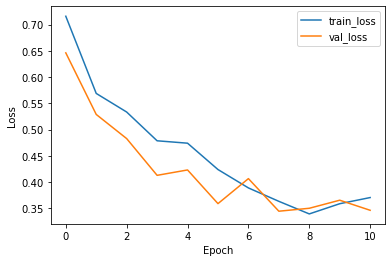

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.8824 - auc_16: 0.9586 - auc_17: 0.9621 - false_negatives_8: 11.6250 - false_positives_8: 6.0000 - loss: 0.3122 - precision_8: 0.9151 - recall_8: 0.8582 - true_negatives_8: 57.0000 - true_positives_8: 59.3750
Test Accuracy: 85.00%
Precision: 0.94
Recall: 0.94
AUC-ROC: 20.00
AUC-PR: 10.00
TP: 0.8936170339584351, FP: 0.807692289352417, TN: 86.0, FN: 84.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step
Confusion Matrix:
[[86 10]
 [20 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        96
           1       0.89      0.81      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8936170212765957
Recall: 0.8076923076923077
F1 Score: 0.8484848484848485
Time taken: 214.57 seconds


In [15]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Conv2D(32, (3, 3), activation='relu')(base_model.output)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model_inceptionv3_conv_gap = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_inceptionv3_conv_gap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                                          tf.keras.metrics.Precision(),
                                                                                          tf.keras.metrics.Recall(),
                                                                                          tf.keras.metrics.AUC(),
                                                                                          tf.keras.metrics.AUC(curve='PR'),
                                                                                          tf.keras.metrics.TruePositives(),
                                                                                          tf.keras.metrics.FalsePositives(),
                                                                                          tf.keras.metrics.TrueNegatives(),
                                                                                          tf.keras.metrics.FalseNegatives()])

# Display model summary
model_inceptionv3_conv_gap.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inceptionv3_conv_gap.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model_inceptionv3_conv_gap.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model_inceptionv3_conv_gap.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Model':'InceptionV3+Conv2D',
    'Epochs':20,
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics4(20).csv', index=False)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_763 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_16[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_763[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_752      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_764 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_752[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_764[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_753      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_765 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_753[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_765[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_754      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 73, 73,    │          0 │ activation_754[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_766 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_33… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_766[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_755      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_767 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_755[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_767[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_756      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,410,049 (85.49 MB)

 Trainable params: 607,265 (2.32 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 811ms/step - accuracy: 0.5376 - auc_18: 0.5749 - auc_19: 0.5816 - false_negatives_9: 116.8846 - false_positives_9: 80.4615 - loss: 0.8046 - precision_9: 0.5781 - recall_9: 0.4610 - true_negatives_9: 132.9231 - true_positives_9: 100.5000 - val_accuracy: 0.7300 - val_auc_18: 0.8452 - val_auc_19: 0.8047 - val_false_negatives_9: 3.0000 - val_false_positives_9: 51.0000 - val_loss: 0.5973 - val_precision_9: 0.6645 - val_recall_9: 0.9712 - val_true_negatives_9: 45.0000 - val_true_positives_9: 101.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 752ms/step - accuracy: 0.6566 - auc_18: 0.7402 - auc_19: 0.7268 - false_negatives_9: 48.3077 - false_positives_9: 102.5000 - loss: 0.5942 - precision_9: 0.6195 - recall_9: 0.7832 - true_negatives_9: 113.8077 - true_positives_9: 166.1538 - val_accuracy: 0.7150 - val_auc_18: 0.8395 - val_auc_19: 0.8069 - val_false_negatives_9: 1.0000 - val_false_positives_9: 56.0000 - val_loss: 0.5732 - val_precision_9: 0.6478 - va

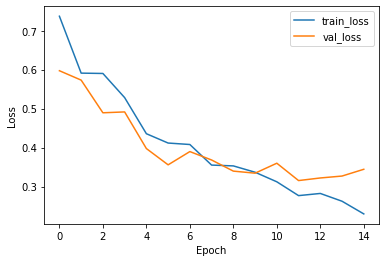

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.8954 - auc_18: 0.9672 - auc_19: 0.9708 - false_negatives_9: 4.0000 - false_positives_9: 11.7500 - loss: 0.2589 - precision_9: 0.8644 - recall_9: 0.9531 - true_negatives_9: 51.2500 - true_positives_9: 67.0000
Test Accuracy: 87.00%
Precision: 0.95
Recall: 0.96
AUC-ROC: 7.00
AUC-PR: 19.00
TP: 0.8362069129943848, FP: 0.932692289352417, TN: 77.0, FN: 97.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 640ms/step
Confusion Matrix:
[[77 19]
 [ 7 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        96
           1       0.84      0.93      0.88       104

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

AUC Score: 0.87

Precision: 0.8362068965517241
Recall: 0.9326923076923077
F1 Score: 0.8818181818181818
Time taken: 297.39 seconds


In [16]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Conv2D(32, (3, 3), activation='relu')(base_model.output)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model_inceptionv3_conv_gap = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_inceptionv3_conv_gap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                                          tf.keras.metrics.Precision(),
                                                                                          tf.keras.metrics.Recall(),
                                                                                          tf.keras.metrics.AUC(),
                                                                                          tf.keras.metrics.AUC(curve='PR'),
                                                                                          tf.keras.metrics.TruePositives(),
                                                                                          tf.keras.metrics.FalsePositives(),
                                                                                          tf.keras.metrics.TrueNegatives(),
                                                                                          tf.keras.metrics.FalseNegatives()])

# Display model summary
model_inceptionv3_conv_gap.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inceptionv3_conv_gap.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model_inceptionv3_conv_gap.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model_inceptionv3_conv_gap.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Model':'InceptionV3+Conv2D',
    'Epochs':40,
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics4(40).csv', index=False)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_858 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_17[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_858[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_846      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_859 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_846[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_859[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_847      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_860 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_847[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_860[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_848      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_37    │ (None, 73, 73,    │          0 │ activation_848[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_861 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_37… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_861[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_849      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_862 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_849[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_862[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_850      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,410,049 (85.49 MB)

 Trainable params: 607,265 (2.32 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 798ms/step - accuracy: 0.5243 - auc_20: 0.5143 - auc_21: 0.4981 - false_negatives_10: 120.4615 - false_positives_10: 81.8077 - loss: 0.7562 - precision_10: 0.4920 - recall_10: 0.3869 - true_negatives_10: 142.0385 - true_positives_10: 86.4615 - val_accuracy: 0.6100 - val_auc_20: 0.6795 - val_auc_21: 0.6413 - val_false_negatives_10: 14.0000 - val_false_positives_10: 64.0000 - val_loss: 0.6662 - val_precision_10: 0.5844 - val_recall_10: 0.8654 - val_true_negatives_10: 32.0000 - val_true_positives_10: 90.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 757ms/step - accuracy: 0.6059 - auc_20: 0.6544 - auc_21: 0.5969 - false_negatives_10: 84.8846 - false_positives_10: 81.2692 - loss: 0.6608 - precision_10: 0.6026 - recall_10: 0.6203 - true_negatives_10: 135.8077 - true_positives_10: 128.8077 - val_accuracy: 0.7650 - val_auc_20: 0.8575 - val_auc_21: 0.8433 - val_false_negatives_10: 17.0000 - val_false_positives_10: 30.0000 - val_loss: 0.5639 - val_preci

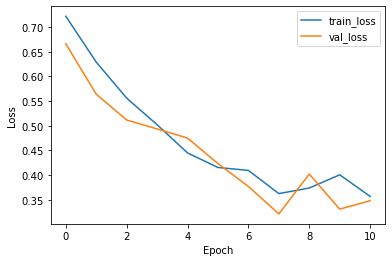

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.9029 - auc_20: 0.9622 - auc_21: 0.9668 - false_negatives_10: 5.2500 - false_positives_10: 9.1250 - loss: 0.2771 - precision_10: 0.8839 - recall_10: 0.9415 - true_negatives_10: 53.8750 - true_positives_10: 65.7500
Test Accuracy: 87.50%
Precision: 0.95
Recall: 0.95
AUC-ROC: 10.00
AUC-PR: 15.00
TP: 0.8623853325843811, FP: 0.9038461446762085, TN: 81.0, FN: 94.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 653ms/step
Confusion Matrix:
[[81 15]
 [10 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        96
           1       0.86      0.90      0.88       104

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

AUC Score: 0.87

Precision: 0.8623853211009175
Recall: 0.9038461538461539
F1 Score: 0.8826291079812206
Time taken: 222.02 seconds


In [17]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Conv2D(32, (3, 3), activation='relu')(base_model.output)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model_inceptionv3_conv_gap = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_inceptionv3_conv_gap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                                          tf.keras.metrics.Precision(),
                                                                                          tf.keras.metrics.Recall(),
                                                                                          tf.keras.metrics.AUC(),
                                                                                          tf.keras.metrics.AUC(curve='PR'),
                                                                                          tf.keras.metrics.TruePositives(),
                                                                                          tf.keras.metrics.FalsePositives(),
                                                                                          tf.keras.metrics.TrueNegatives(),
                                                                                          tf.keras.metrics.FalseNegatives()])

# Display model summary
model_inceptionv3_conv_gap.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inceptionv3_conv_gap.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model_inceptionv3_conv_gap.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model_inceptionv3_conv_gap.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Model':'InceptionV3+Conv2D',
    'Epochs':60,
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics4(60).csv', index=False)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_953 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_18[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_953[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_940      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_954 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_940[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_954[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_941      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_955 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_941[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_955[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_942      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_41    │ (None, 73, 73,    │          0 │ activation_942[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_956 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_41… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_956[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_943      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_957 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_943[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_957[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_944      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,410,049 (85.49 MB)

 Trainable params: 607,265 (2.32 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 816ms/step - accuracy: 0.5032 - auc_22: 0.4808 - auc_23: 0.4590 - false_negatives_11: 111.7308 - false_positives_11: 99.2308 - loss: 0.8839 - precision_11: 0.4936 - recall_11: 0.5261 - true_negatives_11: 120.8846 - true_positives_11: 98.9231 - val_accuracy: 0.6100 - val_auc_22: 0.6833 - val_auc_23: 0.6632 - val_false_negatives_11: 1.0000 - val_false_positives_11: 77.0000 - val_loss: 0.6660 - val_precision_11: 0.5722 - val_recall_11: 0.9904 - val_true_negatives_11: 19.0000 - val_true_positives_11: 103.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 754ms/step - accuracy: 0.6218 - auc_22: 0.6531 - auc_23: 0.6369 - false_negatives_11: 105.3462 - false_positives_11: 61.5000 - loss: 0.6547 - precision_11: 0.6442 - recall_11: 0.5627 - true_negatives_11: 153.8077 - true_positives_11: 110.1154 - val_accuracy: 0.4850 - val_auc_22: 0.8064 - val_auc_23: 0.7720 - val_false_negatives_11: 102.0000 - val_false_positives_11: 1.0000 - val_loss: 0.6239 - val_prec

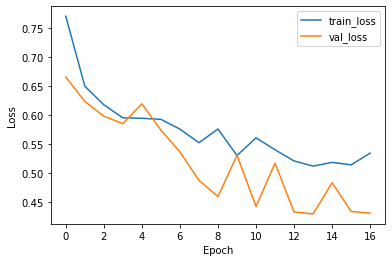

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.9002 - auc_22: 0.9343 - auc_23: 0.9021 - false_negatives_11: 5.1250 - false_positives_11: 10.5000 - loss: 0.4137 - precision_11: 0.8781 - recall_11: 0.9430 - true_negatives_11: 52.5000 - true_positives_11: 65.8750
Test Accuracy: 86.50%
Precision: 0.91
Recall: 0.86
AUC-ROC: 9.00
AUC-PR: 18.00
TP: 0.8407079577445984, FP: 0.9134615659713745, TN: 78.0, FN: 95.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step
Confusion Matrix:
[[78 18]
 [ 9 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        96
           1       0.84      0.91      0.88       104

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

AUC Score: 0.86

Precision: 0.8407079646017699
Recall: 0.9134615384615384
F1 Score: 0.8755760368663594
Time taken: 335.17 seconds


In [18]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Conv2D(32, (3, 3), activation='relu')(base_model.output)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model_inceptionv3_conv_gap = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_inceptionv3_conv_gap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                                          tf.keras.metrics.Precision(),
                                                                                          tf.keras.metrics.Recall(),
                                                                                          tf.keras.metrics.AUC(),
                                                                                          tf.keras.metrics.AUC(curve='PR'),
                                                                                          tf.keras.metrics.TruePositives(),
                                                                                          tf.keras.metrics.FalsePositives(),
                                                                                          tf.keras.metrics.TrueNegatives(),
                                                                                          tf.keras.metrics.FalseNegatives()])

# Display model summary
model_inceptionv3_conv_gap.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inceptionv3_conv_gap.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model_inceptionv3_conv_gap.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model_inceptionv3_conv_gap.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Model':'InceptionV3+Conv2D',
    'Epochs':80,
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics4(80).csv', index=False)

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1048         │ (None, 149, 149,  │        864 │ input_layer_19[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_1048[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1034     │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1049         │ (None, 147, 147,  │      9,216 │ activation_1034[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1049[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1035     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1050         │ (None, 147, 147,  │     18,432 │ activation_1035[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_1050[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1036     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_45    │ (None, 73, 73,    │          0 │ activation_1036[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1051         │ (None, 73, 73,    │      5,120 │ max_pooling2d_45… │
│ (Conv2D)            │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_1051[0][0] │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1037     │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1052         │ (None, 71, 71,    │    138,240 │ activation_1037[… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_1052[0][0] │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1038     │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,410,049 (85.49 MB)

 Trainable params: 607,265 (2.32 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 790ms/step - accuracy: 0.5301 - auc_24: 0.5618 - auc_25: 0.5384 - false_negatives_12: 122.7692 - false_positives_12: 71.6923 - loss: 0.8196 - precision_12: 0.5570 - recall_12: 0.3849 - true_negatives_12: 148.1538 - true_positives_12: 88.1538 - val_accuracy: 0.7150 - val_auc_24: 0.7981 - val_auc_25: 0.7911 - val_false_negatives_12: 14.0000 - val_false_positives_12: 43.0000 - val_loss: 0.6091 - val_precision_12: 0.6767 - val_recall_12: 0.8654 - val_true_negatives_12: 53.0000 - val_true_positives_12: 90.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 751ms/step - accuracy: 0.6513 - auc_24: 0.7318 - auc_25: 0.7645 - false_negatives_12: 53.2308 - false_positives_12: 101.9615 - loss: 0.6025 - precision_12: 0.6334 - recall_12: 0.7680 - true_negatives_12: 108.5385 - true_positives_12: 167.0385 - val_accuracy: 0.7900 - val_auc_24: 0.8625 - val_auc_25: 0.8643 - val_false_negatives_12: 25.0000 - val_false_positives_12: 17.0000 - val_loss: 0.5630 - val_pr

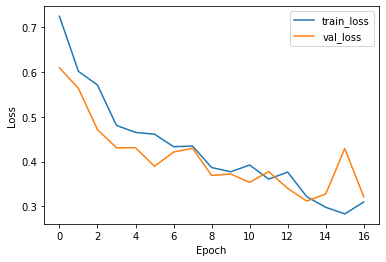

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.8636 - auc_24: 0.9591 - auc_25: 0.9655 - false_negatives_12: 8.2500 - false_positives_12: 11.3750 - loss: 0.2735 - precision_12: 0.8540 - recall_12: 0.8982 - true_negatives_12: 51.6250 - true_positives_12: 62.7500
Test Accuracy: 84.00%
Precision: 0.94
Recall: 0.95
AUC-ROC: 14.00
AUC-PR: 18.00
TP: 0.8333333134651184, FP: 0.8653846383094788, TN: 78.0, FN: 90.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step
Confusion Matrix:
[[78 18]
 [14 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        96
           1       0.83      0.87      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

AUC Score: 0.84

Precision: 0.8333333333333334
Recall: 0.8653846153846154
F1 Score: 0.8490566037735849
Time taken: 333.86 seconds


In [19]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Conv2D(32, (3, 3), activation='relu')(base_model.output)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model_inceptionv3_conv_gap = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_inceptionv3_conv_gap.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                                          tf.keras.metrics.Precision(),
                                                                                          tf.keras.metrics.Recall(),
                                                                                          tf.keras.metrics.AUC(),
                                                                                          tf.keras.metrics.AUC(curve='PR'),
                                                                                          tf.keras.metrics.TruePositives(),
                                                                                          tf.keras.metrics.FalsePositives(),
                                                                                          tf.keras.metrics.TrueNegatives(),
                                                                                          tf.keras.metrics.FalseNegatives()])

# Display model summary
model_inceptionv3_conv_gap.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inceptionv3_conv_gap.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model_inceptionv3_conv_gap.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model_inceptionv3_conv_gap.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Model':'InceptionV3+Conv2D',
    'Epochs':100,
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics4(100).csv', index=False)

In [20]:
# import pandas as pd
# from IPython.display import display


# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model_4metrics_20_epochs.csv")
# metrics_40_epochs = pd.read_csv("model4_metrics_40_epochs.csv")
# metrics_60_epochs = pd.read_csv("model4_metrics_60_epochs.csv")
# metrics_80_epochs = pd.read_csv("model4_metrics_80_epochs.csv")
# metrics_100_epochs = pd.read_csv("model4_metrics_100_epochs.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model4(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)

# # Display metrics
# display(all_metrics)

# # Download the CSV file
# files.download(all_metrics_file)


# INCEPTIONV3 (A) + LSTM + Dense Layers (B)

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1519         │ (None, 149, 149,  │        864 │ input_layer_24[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_1519[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1504     │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1520         │ (None, 147, 147,  │      9,216 │ activation_1504[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1520[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1505     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1521         │ (None, 147, 147,  │     18,432 │ activation_1505[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_1521[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1506     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_65    │ (None, 73, 73,    │          0 │ activation_1506[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1522         │ (None, 73, 73,    │      5,120 │ max_pooling2d_65… │
│ (Conv2D)            │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_1522[0][0] │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1507     │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1523         │ (None, 71, 71,    │    138,240 │ activation_1507[… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_1523[0][0] │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1508     │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,163,361 (92.18 MB)

 Trainable params: 2,360,577 (9.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 678ms/step - accuracy: 0.5826 - auc_28: 0.5757 - auc_29: 0.5686 - false_negatives_14: 139.0769 - false_positives_14: 48.5385 - loss: 0.7946 - precision_14: 0.6085 - recall_14: 0.4842 - true_negatives_14: 169.0769 - true_positives_14: 74.0769 - val_accuracy: 0.5400 - val_auc_28: 0.7976 - val_auc_29: 0.7882 - val_false_negatives_14: 92.0000 - val_false_positives_14: 0.0000e+00 - val_loss: 0.6803 - val_precision_14: 1.0000 - val_recall_14: 0.1154 - val_true_negatives_14: 96.0000 - val_true_positives_14: 12.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 701ms/step - accuracy: 0.6069 - auc_28: 0.7731 - auc_29: 0.7550 - false_negatives_14: 154.4615 - false_positives_14: 7.5385 - loss: 0.6646 - precision_14: 0.8485 - recall_14: 0.2598 - true_negatives_14: 210.0769 - true_positives_14: 58.6923 - val_accuracy: 0.7350 - val_auc_28: 0.8422 - val_auc_29: 0.8173 - val_false_negatives_14: 36.0000 - val_false_positives_14: 17.0000 - val_loss: 0.6291 - val_pre

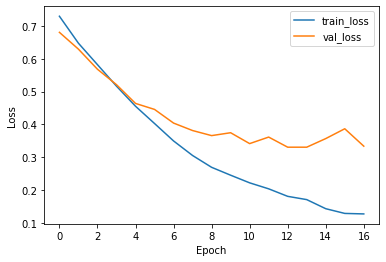

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.8992 - auc_28: 0.9594 - auc_29: 0.9614 - false_negatives_14: 9.0000 - false_positives_14: 6.8750 - loss: 0.2763 - precision_14: 0.9102 - recall_14: 0.8976 - true_negatives_14: 56.1250 - true_positives_14: 62.0000
Test Accuracy: 86.00%
Precision: 0.94
Recall: 0.94
AUC-ROC: 16.00
AUC-PR: 12.00
TP: 0.8799999952316284, FP: 0.8461538553237915, TN: 84.0, FN: 88.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 647ms/step
Confusion Matrix:
[[84 12]
 [16 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        96
           1       0.88      0.85      0.86       104

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

AUC Score: 0.86

Precision: 0.88
Recall: 0.8461538461538461
F1 Score: 0.8627450980392156
Cohen's Kappa Coefficient: 0.72
Matthews Correlation Coefficient (MCC): 

In [25]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import LSTM, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add LSTM layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM
x = LSTM(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics5(20).csv', index=False)

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1613         │ (None, 149, 149,  │        864 │ input_layer_25[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_1613[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1598     │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1614         │ (None, 147, 147,  │      9,216 │ activation_1598[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1614[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1599     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1615         │ (None, 147, 147,  │     18,432 │ activation_1599[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_1615[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1600     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_69    │ (None, 73, 73,    │          0 │ activation_1600[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1616         │ (None, 73, 73,    │      5,120 │ max_pooling2d_69… │
│ (Conv2D)            │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_1616[0][0] │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1601     │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1617         │ (None, 71, 71,    │    138,240 │ activation_1601[… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_1617[0][0] │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1602     │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,163,361 (92.18 MB)

 Trainable params: 2,360,577 (9.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step - accuracy: 0.6414 - auc_30: 0.6794 - auc_31: 0.6179 - false_negatives_15: 75.8462 - false_positives_15: 74.9231 - loss: 0.6455 - precision_15: 0.6192 - recall_15: 0.6354 - true_negatives_15: 150.4231 - true_positives_15: 129.5769 - val_accuracy: 0.7800 - val_auc_30: 0.8782 - val_auc_31: 0.8664 - val_false_negatives_15: 4.0000 - val_false_positives_15: 40.0000 - val_loss: 0.5043 - val_precision_15: 0.7143 - val_recall_15: 0.9615 - val_true_negatives_15: 56.0000 - val_true_positives_15: 100.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 746ms/step - accuracy: 0.8345 - auc_30: 0.9140 - auc_31: 0.9094 - false_negatives_15: 31.3462 - false_positives_15: 38.6923 - loss: 0.3777 - precision_15: 0.8224 - recall_15: 0.8635 - true_negatives_15: 178.5769 - true_positives_15: 182.1538 - val_accuracy: 0.8300 - val_auc_30: 0.9047 - val_auc_31: 0.9070 - val_false_negatives_15: 15.0000 - val_false_positives_15: 19.0000 - val_loss: 0.3915 - val_preci

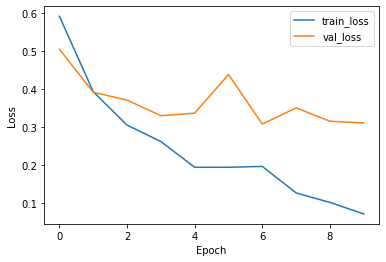

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 511ms/step - accuracy: 0.9030 - auc_30: 0.9616 - auc_31: 0.9649 - false_negatives_15: 9.1250 - false_positives_15: 6.0000 - loss: 0.2501 - precision_15: 0.9183 - recall_15: 0.8961 - true_negatives_15: 57.0000 - true_positives_15: 61.8750
Test Accuracy: 87.00%
Precision: 0.94
Recall: 0.95
AUC-ROC: 16.00
AUC-PR: 10.00
TP: 0.8979591727256775, FP: 0.8461538553237915, TN: 86.0, FN: 88.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step
Confusion Matrix:
[[86 10]
 [16 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        96
           1       0.90      0.85      0.87       104

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

AUC Score: 0.87

Precision: 0.8979591836734694
Recall: 0.8461538461538461
F1 Score: 0.8712871287128713
Cohen's Kappa Coefficient: 0.7402078337330136
Matthews Cor

In [26]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import LSTM, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add LSTM layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM
x = LSTM(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics5(40).csv', index=False)

In [27]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import LSTM, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add LSTM layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM
x = LSTM(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics5(60).csv', index=False)

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1707         │ (None, 149, 149,  │        864 │ input_layer_26[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_1707[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1692     │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1708         │ (None, 147, 147,  │      9,216 │ activation_1692[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1708[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1693     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1709         │ (None, 147, 147,  │     18,432 │ activation_1693[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_1709[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1694     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_73    │ (None, 73, 73,    │          0 │ activation_1694[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1710         │ (None, 73, 73,    │      5,120 │ max_pooling2d_73… │
│ (Conv2D)            │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_1710[0][0] │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1695     │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1711         │ (None, 71, 71,    │    138,240 │ activation_1695[… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_1711[0][0] │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1696     │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,163,361 (92.18 MB)

 Trainable params: 2,360,577 (9.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 794ms/step - accuracy: 0.5777 - auc_32: 0.6186 - auc_33: 0.5877 - false_negatives_16: 92.8462 - false_positives_16: 78.8462 - loss: 0.6958 - precision_16: 0.5782 - recall_16: 0.5016 - true_negatives_16: 138.0769 - true_positives_16: 121.0000 - val_accuracy: 0.6450 - val_auc_32: 0.8481 - val_auc_33: 0.8319 - val_false_negatives_16: 65.0000 - val_false_positives_16: 6.0000 - val_loss: 0.5661 - val_precision_16: 0.8667 - val_recall_16: 0.3750 - val_true_negatives_16: 90.0000 - val_true_positives_16: 39.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 758ms/step - accuracy: 0.7925 - auc_32: 0.8663 - auc_33: 0.8599 - false_negatives_16: 38.6923 - false_positives_16: 51.1154 - loss: 0.4740 - precision_16: 0.7982 - recall_16: 0.8007 - true_negatives_16: 166.1538 - true_positives_16: 174.8077 - val_accuracy: 0.8100 - val_auc_32: 0.8840 - val_auc_33: 0.8800 - val_false_negatives_16: 8.0000 - val_false_positives_16: 30.0000 - val_loss: 0.4597 - val_precisi

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.9074 - auc_32: 0.9641 - auc_33: 0.9526 - false_negatives_16: 8.0000 - false_positives_16: 6.3750 - loss: 0.2320 - precision_16: 0.9161 - recall_16: 0.9081 - true_negatives_16: 56.6250 - true_positives_16: 63.0000
Test Accuracy: 87.50%
Precision: 0.95
Recall: 0.94
AUC-ROC: 14.00
AUC-PR: 11.00
TP: 0.8910890817642212, FP: 0.8653846383094788, TN: 85.0, FN: 90.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 639ms/step
Confusion Matrix:
[[85 11]
 [14 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        96
           1       0.89      0.87      0.88       104

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

AUC Score: 0.88

Precision: 0.8910891089108911
Recall: 0.8653846153846154
F1 Score: 0.878048780487805
Cohen's Kappa Coefficient: 0.7498999599839935
Matthews Corr

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1801         │ (None, 149, 149,  │        864 │ input_layer_27[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_1801[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1786     │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1802         │ (None, 147, 147,  │      9,216 │ activation_1786[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1802[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1787     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1803         │ (None, 147, 147,  │     18,432 │ activation_1787[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_1803[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1788     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_77    │ (None, 73, 73,    │          0 │ activation_1788[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1804         │ (None, 73, 73,    │      5,120 │ max_pooling2d_77… │
│ (Conv2D)            │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_1804[0][0] │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1789     │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1805         │ (None, 71, 71,    │    138,240 │ activation_1789[… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_1805[0][0] │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1790     │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,163,361 (92.18 MB)

 Trainable params: 2,360,577 (9.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 804ms/step - accuracy: 0.5899 - auc_34: 0.6411 - auc_35: 0.6438 - false_negatives_17: 72.6154 - false_positives_17: 89.5000 - loss: 0.6769 - precision_17: 0.5737 - recall_17: 0.6031 - true_negatives_17: 119.6538 - true_positives_17: 149.0000 - val_accuracy: 0.6700 - val_auc_34: 0.8607 - val_auc_35: 0.8574 - val_false_negatives_17: 60.0000 - val_false_positives_17: 6.0000 - val_loss: 0.5381 - val_precision_17: 0.8800 - val_recall_17: 0.4231 - val_true_negatives_17: 90.0000 - val_true_positives_17: 44.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 748ms/step - accuracy: 0.7968 - auc_34: 0.8858 - auc_35: 0.8649 - false_negatives_17: 41.2692 - false_positives_17: 48.1538 - loss: 0.4414 - precision_17: 0.7928 - recall_17: 0.8018 - true_negatives_17: 169.0769 - true_positives_17: 172.2692 - val_accuracy: 0.7200 - val_auc_34: 0.8965 - val_auc_35: 0.8940 - val_false_negatives_17: 49.0000 - val_false_positives_17: 7.0000 - val_loss: 0.4814 - val_precisi

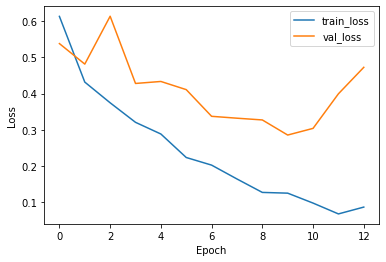

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - accuracy: 0.8991 - auc_34: 0.9684 - auc_35: 0.9695 - false_negatives_17: 10.3750 - false_positives_17: 5.2500 - loss: 0.2285 - precision_17: 0.9260 - recall_17: 0.8794 - true_negatives_17: 57.7500 - true_positives_17: 60.6250
Test Accuracy: 86.50%
Precision: 0.96
Recall: 0.96
AUC-ROC: 18.00
AUC-PR: 9.00
TP: 0.9052631855010986, FP: 0.8269230723381042, TN: 87.0, FN: 86.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 643ms/step
Confusion Matrix:
[[87  9]
 [18 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        96
           1       0.91      0.83      0.86       104

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200

AUC Score: 0.87

Precision: 0.9052631578947369
Recall: 0.8269230769230769
F1 Score: 0.8643216080402011
Cohen's Kappa Coefficient: 0.7305389221556886
Matthews Cor

In [28]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import LSTM, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add LSTM layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM
x = LSTM(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics5(80).csv', index=False)

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1895         │ (None, 149, 149,  │        864 │ input_layer_28[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_1895[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1880     │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1896         │ (None, 147, 147,  │      9,216 │ activation_1880[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1896[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1881     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1897         │ (None, 147, 147,  │     18,432 │ activation_1881[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_1897[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1882     │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_81    │ (None, 73, 73,    │          0 │ activation_1882[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1898         │ (None, 73, 73,    │      5,120 │ max_pooling2d_81… │
│ (Conv2D)            │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_1898[0][0] │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1883     │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1899         │ (None, 71, 71,    │    138,240 │ activation_1883[… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_1899[0][0] │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1884     │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,163,361 (92.18 MB)

 Trainable params: 2,360,577 (9.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 827ms/step - accuracy: 0.5193 - auc_36: 0.5672 - auc_37: 0.5501 - false_negatives_18: 46.7308 - false_positives_18: 163.0000 - loss: 0.7746 - precision_18: 0.5000 - recall_18: 0.6959 - true_negatives_18: 54.8077 - true_positives_18: 166.2308 - val_accuracy: 0.5200 - val_auc_36: 0.7311 - val_auc_37: 0.7429 - val_false_negatives_18: 0.0000e+00 - val_false_positives_18: 96.0000 - val_loss: 0.6889 - val_precision_18: 0.5200 - val_recall_18: 1.0000 - val_true_negatives_18: 0.0000e+00 - val_true_positives_18: 104.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 759ms/step - accuracy: 0.5125 - auc_36: 0.7268 - auc_37: 0.7200 - false_negatives_18: 0.0000e+00 - false_positives_18: 210.5000 - loss: 0.6796 - precision_18: 0.5089 - recall_18: 1.0000 - true_negatives_18: 4.6923 - true_positives_18: 215.5769 - val_accuracy: 0.6600 - val_auc_36: 0.8460 - val_auc_37: 0.8277 - val_false_negatives_18: 0.0000e+00 - val_false_positives_18: 68.0000 - val_loss: 0.66

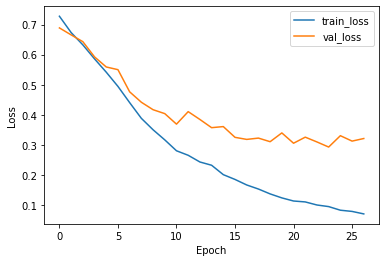

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.9087 - auc_36: 0.9661 - auc_37: 0.9645 - false_negatives_18: 9.0000 - false_positives_18: 5.2500 - loss: 0.2366 - precision_18: 0.9275 - recall_18: 0.8976 - true_negatives_18: 57.7500 - true_positives_18: 62.0000
Test Accuracy: 87.50%
Precision: 0.95
Recall: 0.95
AUC-ROC: 16.00
AUC-PR: 9.00
TP: 0.907216489315033, FP: 0.8461538553237915, TN: 87.0, FN: 88.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 646ms/step
Confusion Matrix:
[[87  9]
 [16 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        96
           1       0.91      0.85      0.88       104

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

AUC Score: 0.88

Precision: 0.9072164948453608
Recall: 0.8461538461538461
F1 Score: 0.8756218905472636
Cohen's Kappa Coefficient: 0.7502996404314822
Matthews Corre

In [29]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import LSTM, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add LSTM layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM
x = LSTM(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics5(100).csv', index=False)

In [30]:
# import pandas as pd
# from IPython.display import display
# from google.colab import files

# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model5_20_metrics.csv")
# metrics_40_epochs = pd.read_csv("model5_40_metrics.csv")
# metrics_60_epochs = pd.read_csv("model5_60_metrics.csv")
# metrics_80_epochs = pd.read_csv("model5_80_metrics.csv")
# metrics_100_epochs = pd.read_csv("model5_100_metrics.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model5(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)

# # Display metrics
# display(all_metrics)

# # Download the CSV file
# files.download(all_metrics_file)


# INCEPTIONV3 (A) + GRU + Dense Layers (B)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 149, 149, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_28

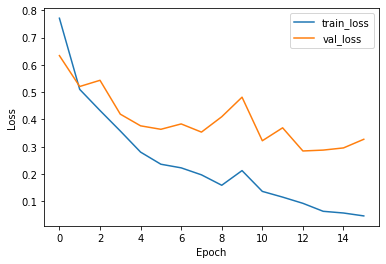

7/7 [==============================] - 3s 420ms/step - loss: 0.2839 - accuracy: 0.8750 - precision_3: 0.9072 - recall_3: 0.8462 - auc_6: 0.9552 - auc_7: 0.9599 - true_positives_3: 88.0000 - false_positives_3: 9.0000 - true_negatives_3: 87.0000 - false_negatives_3: 16.0000
Test Accuracy: 87.50%
Precision: 0.91
Recall: 0.85
AUC-ROC: 0.96
AUC-PR: 0.96
TP: 88.0, FP: 9.0, TN: 87.0, FN: 16.0
7/7 [==============================] - 4s 417ms/step
Confusion Matrix:
[[87  9]
 [16 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        96
           1       0.91      0.85      0.88       104

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

AUC Score: 0.88

Precision: 0.9072164948453608
Recall: 0.8461538461538461
F1 Score: 0.8756218905472636
Cohen's Kappa Coefficient: 0.7502996404314822
Matthews Correlation C

In [9]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GRU, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add GRU layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for GRU
x = GRU(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics6(20).csv', index=False)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_376 (Conv2D)         (None, 149, 149, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 149, 149, 32)         96        ['conv2d_376[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_37

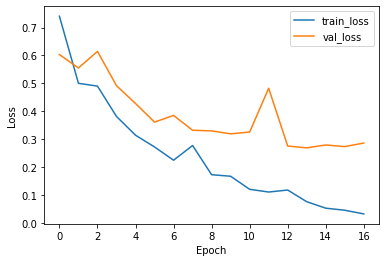

7/7 [==============================] - 3s 419ms/step - loss: 0.2690 - accuracy: 0.8850 - precision_4: 0.8932 - recall_4: 0.8846 - auc_8: 0.9555 - auc_9: 0.9585 - true_positives_4: 92.0000 - false_positives_4: 11.0000 - true_negatives_4: 85.0000 - false_negatives_4: 12.0000
Test Accuracy: 88.50%
Precision: 0.89
Recall: 0.88
AUC-ROC: 0.96
AUC-PR: 0.96
TP: 92.0, FP: 11.0, TN: 85.0, FN: 12.0
7/7 [==============================] - 3s 416ms/step
Confusion Matrix:
[[85 11]
 [12 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        96
           1       0.89      0.88      0.89       104

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200

AUC Score: 0.89

Precision: 0.8932038834951457
Recall: 0.8846153846153846
F1 Score: 0.8888888888888888
Cohen's Kappa Coefficient: 0.7697236684020825
Matthews Correlation

In [10]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GRU, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add GRU layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for GRU
x = GRU(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics6(40).csv', index=False)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_470 (Conv2D)         (None, 149, 149, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_470 (B  (None, 149, 149, 32)         96        ['conv2d_470[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_470 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_47

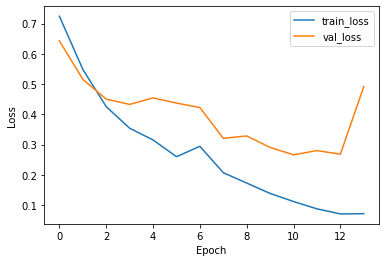

7/7 [==============================] - 3s 424ms/step - loss: 0.2661 - accuracy: 0.8850 - precision_5: 0.8785 - recall_5: 0.9038 - auc_10: 0.9562 - auc_11: 0.9588 - true_positives_5: 94.0000 - false_positives_5: 13.0000 - true_negatives_5: 83.0000 - false_negatives_5: 10.0000
Test Accuracy: 88.50%
Precision: 0.88
Recall: 0.90
AUC-ROC: 0.96
AUC-PR: 0.96
TP: 94.0, FP: 13.0, TN: 83.0, FN: 10.0
7/7 [==============================] - 4s 421ms/step
Confusion Matrix:
[[83 13]
 [10 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        96
           1       0.88      0.90      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200

AUC Score: 0.88

Precision: 0.8785046728971962
Recall: 0.9038461538461539
F1 Score: 0.8909952606635071
Cohen's Kappa Coefficient: 0.7693541917368631
Matthews Correlati

In [11]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GRU, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add GRU layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for GRU
x = GRU(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics6(60).csv', index=False)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_564 (Conv2D)         (None, 149, 149, 32)         864       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_564 (B  (None, 149, 149, 32)         96        ['conv2d_564[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_564 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_56

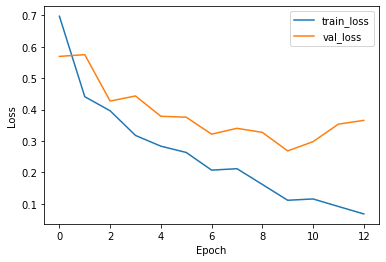

7/7 [==============================] - 3s 421ms/step - loss: 0.2685 - accuracy: 0.8750 - precision_6: 0.8692 - recall_6: 0.8942 - auc_12: 0.9553 - auc_13: 0.9615 - true_positives_6: 93.0000 - false_positives_6: 14.0000 - true_negatives_6: 82.0000 - false_negatives_6: 11.0000
Test Accuracy: 87.50%
Precision: 0.87
Recall: 0.89
AUC-ROC: 0.96
AUC-PR: 0.96
TP: 93.0, FP: 14.0, TN: 82.0, FN: 11.0
7/7 [==============================] - 4s 420ms/step
Confusion Matrix:
[[82 14]
 [11 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        96
           1       0.87      0.89      0.88       104

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

AUC Score: 0.87

Precision: 0.8691588785046729
Recall: 0.8942307692307693
F1 Score: 0.881516587677725
Cohen's Kappa Coefficient: 0.7492980344965905
Matthews Correlatio

In [12]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GRU, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add GRU layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for GRU
x = GRU(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics6(80).csv', index=False)

In [13]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GRU, Dense, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add GRU layer
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for GRU
x = GRU(256)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Create a dictionary to store metrics
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Correlation Coefficient (MCC)': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Time taken (seconds)': [end_time - start_time]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics6(100).csv', index=False)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_658 (Conv2D)         (None, 149, 149, 32)         864       ['input_8[0][0]']             
                                                                                                  
 batch_normalization_658 (B  (None, 149, 149, 32)         96        ['conv2d_658[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_658 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_65

7/7 [==============================] - 3s 423ms/step - loss: 0.2884 - accuracy: 0.8700 - precision_7: 0.8611 - recall_7: 0.8942 - auc_14: 0.9495 - auc_15: 0.9547 - true_positives_7: 93.0000 - false_positives_7: 15.0000 - true_negatives_7: 81.0000 - false_negatives_7: 11.0000
Test Accuracy: 87.00%
Precision: 0.86
Recall: 0.89
AUC-ROC: 0.95
AUC-PR: 0.95
TP: 93.0, FP: 15.0, TN: 81.0, FN: 11.0
7/7 [==============================] - 4s 419ms/step
Confusion Matrix:
[[81 15]
 [11 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        96
           1       0.86      0.89      0.88       104

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

AUC Score: 0.87

Precision: 0.8611111111111112
Recall: 0.8942307692307693
F1 Score: 0.8773584905660378
Cohen's Kappa Coefficient: 0.7391653290529695
Matthews Correlati

In [14]:
# import pandas as pd
# from IPython.display import display
# from google.colab import files

# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model6_20_metrics.csv")
# metrics_40_epochs = pd.read_csv("model6_40_metrics.csv")
# metrics_60_epochs = pd.read_csv("model6_60_metrics.csv")
# metrics_80_epochs = pd.read_csv("model6_80_metrics.csv")
# metrics_100_epochs = pd.read_csv("model6_100_metrics.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model6(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)

# # Display metrics
# display(all_metrics)

# # Download the CSV file
# files.download(all_metrics_file)


# INCEPTIONV3 (A) + Attention Mechanism + Dense Layers (B):

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1319 (Conv2D)        (None, 149, 149, 32)         864       ['input_16[0][0]']            
                                                                                                  
 batch_normalization_1316 (  (None, 149, 149, 32)         96        ['conv2d_1319[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1316 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_1

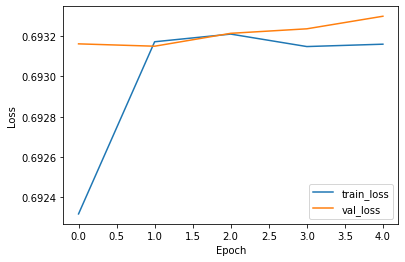

7/7 [==============================] - 3s 436ms/step - loss: 0.6932 - accuracy: 0.4800
Test Accuracy: 48.00%
7/7 [==============================] - 3s 432ms/step
Confusion Matrix:
[[ 96   0]
 [104   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.48      0.31       200

AUC Score: 0.50

Precision: 1.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 98.66 seconds


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3 with attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions, zero_division=1)
recall = recall_score(y_test, test_predictions, zero_division=1)
f1 = f1_score(y_test, test_predictions, zero_division=1)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3 with Attention',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('inceptionv3(7)_20_metrics.csv', index=False)


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_940 (Conv2D)         (None, 149, 149, 32)         864       ['input_11[0][0]']            
                                                                                                  
 batch_normalization_940 (B  (None, 149, 149, 32)         96        ['conv2d_940[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_940 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_94

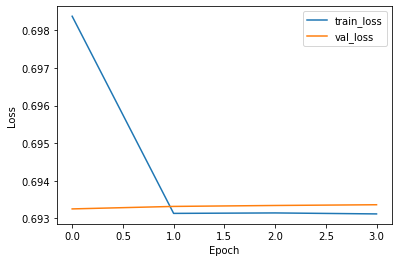

7/7 [==============================] - 3s 425ms/step - loss: 0.6933 - accuracy: 0.4800
Test Accuracy: 48.00%
7/7 [==============================] - 3s 428ms/step
Confusion Matrix:
[[ 96   0]
 [104   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.48      0.31       200

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 86.47 seconds


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packa

In [17]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3 with attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3 with Attention',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('inceptionv3(7)_40_metrics.csv', index=False)


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1034 (Conv2D)        (None, 149, 149, 32)         864       ['input_12[0][0]']            
                                                                                                  
 batch_normalization_1034 (  (None, 149, 149, 32)         96        ['conv2d_1034[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1034 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_10

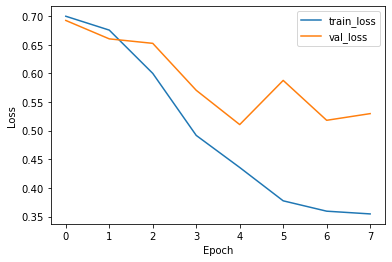

7/7 [==============================] - 3s 428ms/step - loss: 0.5106 - accuracy: 0.8200
Test Accuracy: 82.00%
7/7 [==============================] - 3s 425ms/step
Confusion Matrix:
[[90  6]
 [30 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        96
           1       0.93      0.71      0.80       104

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200

AUC Score: 0.82

Precision: 0.925
Recall: 0.7115384615384616
F1 Score: 0.8043478260869567
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.66
Balanced Accuracy: 0.82
Time taken: 161.60 seconds


In [18]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3 with attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3 with Attention',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('inceptionv3(7)_60_metrics.csv', index=False)


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1128 (Conv2D)        (None, 149, 149, 32)         864       ['input_13[0][0]']            
                                                                                                  
 batch_normalization_1128 (  (None, 149, 149, 32)         96        ['conv2d_1128[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1128 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_1

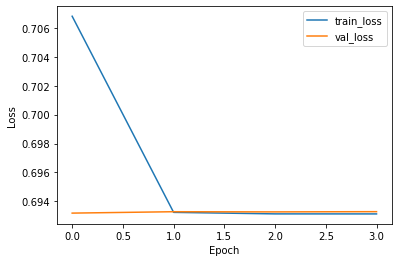

7/7 [==============================] - 3s 427ms/step - loss: 0.6932 - accuracy: 0.4800
Test Accuracy: 48.00%
7/7 [==============================] - 3s 428ms/step
Confusion Matrix:
[[ 96   0]
 [104   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.48      0.31       200

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 86.01 seconds


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packa

In [19]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3 with attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3 with Attention',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('inceptionv3(7)_80_metrics.csv', index=False)


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1222 (Conv2D)        (None, 149, 149, 32)         864       ['input_14[0][0]']            
                                                                                                  
 batch_normalization_1222 (  (None, 149, 149, 32)         96        ['conv2d_1222[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1222 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_1

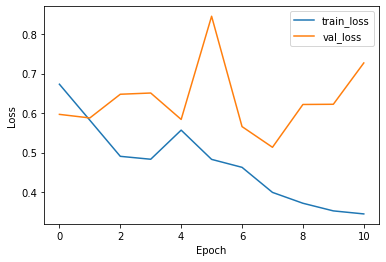

7/7 [==============================] - 3s 425ms/step - loss: 0.5134 - accuracy: 0.7850
Test Accuracy: 78.50%
7/7 [==============================] - 3s 429ms/step
Confusion Matrix:
[[84 12]
 [31 73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        96
           1       0.86      0.70      0.77       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200

AUC Score: 0.79

Precision: 0.8588235294117647
Recall: 0.7019230769230769
F1 Score: 0.7724867724867726
Cohen's Kappa Coefficient: 0.57
Matthews Correlation Coefficient (MCC): 0.58
Balanced Accuracy: 0.79
Time taken: 218.80 seconds


In [20]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3 with attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3 with Attention',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('inceptionv3(7)_100_metrics.csv', index=False)


In [21]:
# import pandas as pd
# from IPython.display import display
# from google.colab import files

# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model7_20_metrics.csv")
# metrics_40_epochs = pd.read_csv("model7_40_metrics.csv")
# metrics_60_epochs = pd.read_csv("model7_60_metrics.csv")
# metrics_80_epochs = pd.read_csv("model7_80_metrics.csv")
# metrics_100_epochs = pd.read_csv("model7_100_metrics.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model7(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)

# # Display metrics
# display(all_metrics)

# # Download the CSV file
# files.download(all_metrics_file)


# INCEPTIONV3 (A) + Capsule Network + Dense Layers (B):

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 149, 149, 32)         96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_28

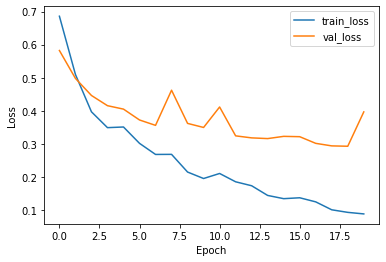

7/7 [==============================] - 3s 420ms/step - loss: 0.3969 - accuracy: 0.8300
Test Accuracy: 83.00%
7/7 [==============================] - 4s 421ms/step
Confusion Matrix:
[[92  4]
 [30 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        96
           1       0.95      0.71      0.81       104

    accuracy                           0.83       200
   macro avg       0.85      0.83      0.83       200
weighted avg       0.86      0.83      0.83       200

AUC Score: 0.83

Precision: 0.9487179487179487
Recall: 0.7115384615384616
F1 Score: 0.8131868131868132
Cohen's Kappa Coefficient: 0.6629659000793021
Matthews Correlation Coefficient (MCC): 0.6861463565634681
Balanced Accuracy: 0.8349358974358975
Time taken: 305.53 seconds


In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Define InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient (MCC)': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('inceptionv3(8,20)_metrics.csv', index=False)


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1601 (Conv2D)        (None, 149, 149, 32)         864       ['input_19[0][0]']            
                                                                                                  
 batch_normalization_1598 (  (None, 149, 149, 32)         96        ['conv2d_1601[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1598 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_1

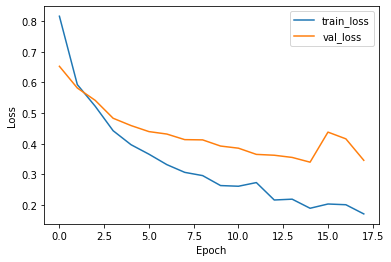

7/7 [==============================] - 3s 420ms/step - loss: 0.3399 - accuracy: 0.8550
Test Accuracy: 85.50%
7/7 [==============================] - 3s 420ms/step
Confusion Matrix:
[[81 15]
 [14 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        96
           1       0.86      0.87      0.86       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8571428571428571
Recall: 0.8653846153846154
F1 Score: 0.8612440191387559
Cohen's Kappa Coefficient: 0.7094188376753507
Matthews Correlation Coefficient (MCC): 0.7094544536097257
Balanced Accuracy: 0.8545673076923077
Time taken: 282.08 seconds


In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Define InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient (MCC)': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('inceptionv3(8,40)_metrics.csv', index=False)


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1695 (Conv2D)        (None, 149, 149, 32)         864       ['input_20[0][0]']            
                                                                                                  
 batch_normalization_1692 (  (None, 149, 149, 32)         96        ['conv2d_1695[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1692 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_1

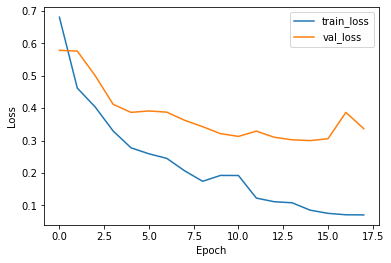

7/7 [==============================] - 3s 419ms/step - loss: 0.3002 - accuracy: 0.8850
Test Accuracy: 88.50%
7/7 [==============================] - 3s 420ms/step
Confusion Matrix:
[[81 15]
 [ 8 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        96
           1       0.86      0.92      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200

AUC Score: 0.88

Precision: 0.8648648648648649
Recall: 0.9230769230769231
F1 Score: 0.8930232558139535
Cohen's Kappa Coefficient: 0.7689835275210928
Matthews Correlation Coefficient (MCC): 0.7708913026187127
Balanced Accuracy: 0.8834134615384616
Time taken: 281.46 seconds


In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Define InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient (MCC)': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('inceptionv3(8,60)_metrics.csv', index=False)


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1789 (Conv2D)        (None, 149, 149, 32)         864       ['input_21[0][0]']            
                                                                                                  
 batch_normalization_1786 (  (None, 149, 149, 32)         96        ['conv2d_1789[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1786 (Activatio  (None, 149, 149, 32)         0         ['batch_normalization_1

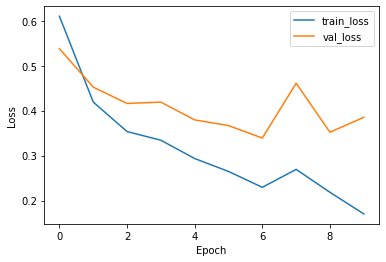

7/7 [==============================] - 3s 420ms/step - loss: 0.3391 - accuracy: 0.8550
Test Accuracy: 85.50%
7/7 [==============================] - 3s 422ms/step
Confusion Matrix:
[[76 20]
 [ 9 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        96
           1       0.83      0.91      0.87       104

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8260869565217391
Recall: 0.9134615384615384
F1 Score: 0.867579908675799
Cohen's Kappa Coefficient: 0.7082494969818913
Matthews Correlation Coefficient (MCC): 0.712626535744939
Balanced Accuracy: 0.8525641025641025
Time taken: 161.00 seconds


In [28]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Define InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient (MCC)': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('inceptionv3(8,80)_metrics.csv', index=False)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 149, 149, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_188[

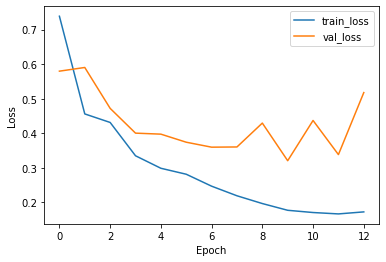

7/7 [==============================] - 3s 427ms/step - loss: 0.3205 - accuracy: 0.8500
Test Accuracy: 85.00%
7/7 [==============================] - 3s 416ms/step
Confusion Matrix:
[[84 12]
 [18 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        96
           1       0.88      0.83      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8775510204081632
Recall: 0.8269230769230769
F1 Score: 0.8514851485148514
Cohen's Kappa Coefficient: 0.7002398081534772
Matthews Correlation Coefficient (MCC): 0.7015016280247258
Balanced Accuracy: 0.8509615384615384
Time taken: 196.30 seconds


In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Add channel dimension and repeat to match InceptionV3 input shape

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)


# Define InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'InceptionV3',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Cohen\'s Kappa Coefficient': kappa,
    'Matthews Correlation Coefficient (MCC)': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('inceptionv3(8,100)_metrics.csv', index=False)


In [ ]:
# import pandas as pd
# from IPython.display import display
# from google.colab import files

# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model8_20_metrics.csv")
# metrics_40_epochs = pd.read_csv("model8_40_metrics.csv")
# metrics_60_epochs = pd.read_csv("model8_60_metrics.csv")
# metrics_80_epochs = pd.read_csv("model8_80_metrics.csv")
# metrics_100_epochs = pd.read_csv("model8_100_metrics.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model8(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)

# # Display metrics
# display(all_metrics)

# # Download the CSV file
# files.download(all_metrics_file)
